# Projeto 01: Reconhecimento de Dígitos

### João Victor Soares Silva | Mat: 20210027300
### Yhasmim de Souza Tigre | Mat: 20210026966 

## Pré-Processamento

In [1]:
from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

from Algoritmos import *

In [2]:
N = 28 #Número de linhas e colunas das matrizes das imagens
P_MAX = 255 #Número máximo de um pixel

In [3]:
def reduzir (nome : str, arq : str) -> None:
    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas
    lista_y = []
    lista_intensidade = []
    lista_simetria_vertical = []
    lista_simetria_horizontal = []
    lista_simetria = []

    for i in range (len(aux)): #Salvando as labels
        lista_y.append (int(aux[i][0]))
    
    aux = np.delete (aux, 0, 1) #Removendo as labels
    
    for i in range (len(aux)): #Calculando as intensidades
        soma = 0

        for j in range (len(aux[0])):
            soma += int(aux[i][j])
        
        lista_intensidade.append(soma/P_MAX)
    
    for imagem in aux: #Simetria vertical
        soma = 0

        for i in range(N):
            for j in range(int(N/2)):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[(N*i) + (N - j - 1)]))

        lista_simetria_vertical.append(soma/P_MAX)

    for imagem in aux: #Simetria horizontal
        soma = 0

        for i in range(int(N/2)):
            for j in range(N):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[N * (N - i - 1) + j]))

        lista_simetria_horizontal.append(soma/P_MAX)
    
    for i in range (len(aux)): #Somando as simetrias
        lista_simetria.append(lista_simetria_vertical[i] + lista_simetria_horizontal[i])

    #Criando e preenchendo o novo .csv
    dados_redux = open (f'{nome}.csv', 'w')

    dados_redux.write ('label;intensidade;simetria\n')
    for i in range (len(aux)):
        dados_redux.write (f'{lista_y[i]};{lista_intensidade[i]};{lista_simetria[i]}\n')
    
    dados_redux.close()

    return

In [4]:
#Reduzindo as dimensões:

reduzir(nome = 'train_redu', arq = 'train.csv')
reduzir(nome = 'test_redu', arq = 'test.csv')

## Funções

#### Auxiliares

In [5]:
def mod_labels (X : np.array, Y : np.array, labels : list) -> np.array:
    if (len(labels) != 2):
        print("Selecione as duas labels que deverão ser classificadas.")

        return None

    novo_X = []
    novo_Y = []

    for i in range (len(Y)):
        if (Y[i] == labels[0]):
            novo_X.append(X[i])
            novo_Y.append(1)
        
        elif (Y[i] == labels[1]):
            novo_X.append(X[i])
            novo_Y.append(-1)
    
    return np.array(novo_X), np.array(novo_Y)

In [6]:
def normalizar (x : np.array) -> np.array:
    media = np.mean(x)
    desvio = np.std(x)

    return ((x - media) / desvio)

Separando Features e Labels

In [7]:
#Instanciando dados gerais:

#Treino:
train = pd.read_csv("train_redu.csv", sep = ";")
train[['intensidade', 'simetria']] = train[['intensidade', 'simetria']].apply(normalizar)
X_train = train[['intensidade', 'simetria']].to_numpy(dtype = float)
y_train = train['label'].to_numpy(dtype = float)

#Teste:
test = pd.read_csv("test_redu.csv", sep = ";")
test[['intensidade', 'simetria']] = test[['intensidade', 'simetria']].apply(normalizar)
X_test = test[['intensidade', 'simetria']].to_numpy(dtype = float)
y_test = test['label'].to_numpy(dtype = float)

#### De Visualização

In [8]:
def plot_alg_1x5 (w_lista : np.array, dados_df : pd.DataFrame) -> None:
    digitos_df = dados_df.loc[dados_df['label'].isin([1, 5])]
    sns.set_theme()
    sns.jointplot(data = digitos_df, x = "intensidade", y = "simetria", hue = "label", palette = "Set2") 

    r = np.linspace(-3, 3, 10)
    plt.plot(r, (-w_lista[0] - w_lista[1]*r) / w_lista[2], c = 'lightseagreen')
    
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()

    return None

In [9]:
def plot_alg_1vTodos (w_lista : np.array, dados_df : pd.DataFrame) -> None:
    digitos_df = dados_df
    sns.set_theme()
    sns.jointplot(data = digitos_df, x = "intensidade", y = "simetria", hue = "label", palette = "Set2") 

    reta_lista = []
    for i in range (len(w_lista)):
        reta_lista.append(np.linspace(-3, 3, 10))

    cor_lista = ['lightseagreen', 'cornflowerblue', 'mediumorchid']
    for w, c, r in zip (w_lista, cor_lista, reta_lista):
        plt.plot(r, (-w[0] - w[1]*r) / w[2], c = c)
    
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()

    return None

In [10]:
def plot_relatorio_eff_1x5 (Y_pred : np.array, Y_real : np.array) -> None:
    print("Relatório de Eficácia:\n\n" + classification_report(y_true = Y_real, y_pred = Y_pred))

    #Matriz de Confusão
    mat_con = confusion_matrix (y_true = Y_real, y_pred = Y_pred)
    plt.rcParams['axes.grid'] = False
    ax = sns.heatmap(mat_con, annot = True, fmt = 'd')

    ax.set_xlabel("Classificação Prevista", fontsize = 14, labelpad = 20)
    ax.xaxis.set_ticklabels(['Negativo', 'Positivo'])
    
    ax.set_ylabel("Classificação Real", fontsize = 14, labelpad = 20)
    ax.yaxis.set_ticklabels(['Negativo', 'Positivo'])
    
    ax.set_title("Matriz de Confusão", fontsize = 14, pad = 20)

    plt.show()

    return None

In [11]:
def plot_relatorio_eff_1vTodos (Y_pred : np.array, Y_real : np.array, ordem : list) -> None:
    print("Relatório de Eficácia:\n\n" + classification_report(y_true = Y_real, y_pred = Y_pred))

    #Matriz de Confusão
    mat_con = confusion_matrix (y_true = Y_real, y_pred = Y_pred)
    plt.rcParams['axes.grid'] = False
    ax = sns.heatmap(mat_con, annot = True, fmt = 'd')

    ax.set_xlabel("Classificação Prevista", fontsize = 14, labelpad = 20)
    ax.xaxis.set_ticklabels(ordem)
    
    ax.set_ylabel("Classificação Real", fontsize = 14, labelpad = 20)
    ax.yaxis.set_ticklabels(ordem)
    
    ax.set_title("Matriz de Confusão", fontsize = 14, pad = 20)

    plt.show()

    return None

## Classificação dos Dígitos 1x5

In [12]:
#Instanciando para o problema:

X_train_1x5, y_train_1x5 = mod_labels (X = X_train, Y = y_train, labels = [1, 5])
X_test_1x5, y_test_1x5 = mod_labels (X = X_test, Y = y_test, labels = [1, 5])

### Perceptron Learning Algorithm (PLA)

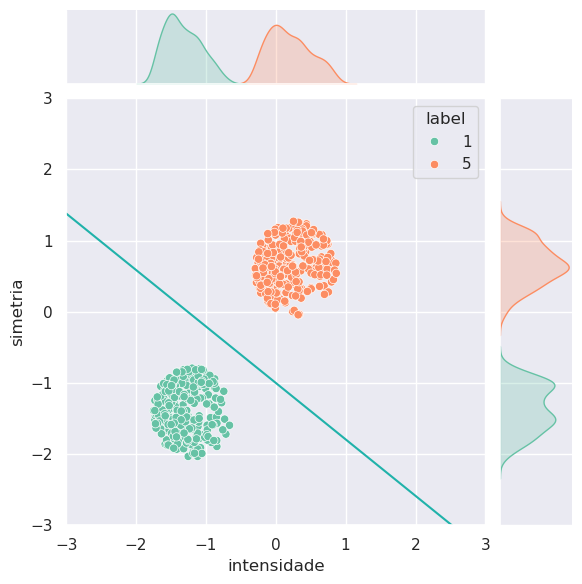

In [13]:
#Instanciando o objeto:
PLA_1x5 = PLA (n_int = 1000)

#Treinando:
PLA_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
PLA_w_1x5 = PLA_1x5.get_w()

#Observando no gráfico:
plot_alg_1x5 (w_lista = PLA_w_1x5, dados_df = test)

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



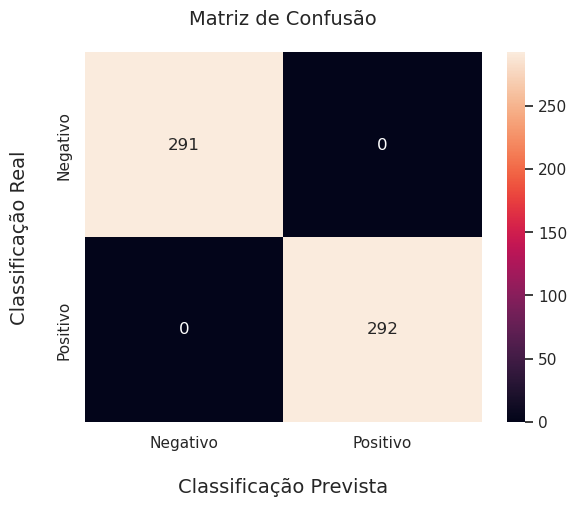

In [14]:
plot_relatorio_eff_1x5 (Y_pred = PLA_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Regressão Linear

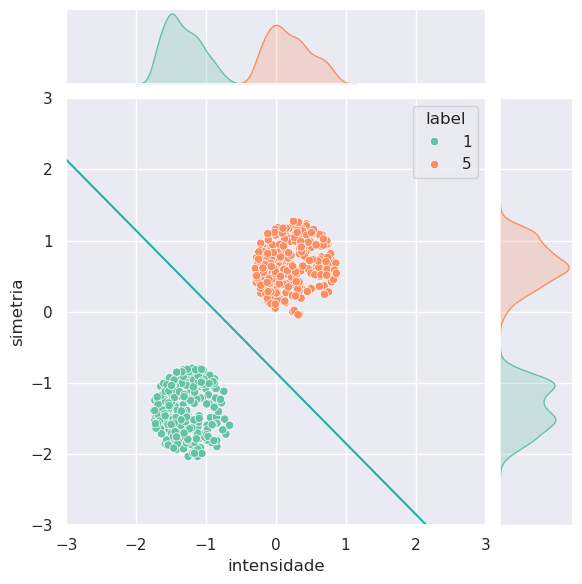

In [15]:
#Instanciando o objeto:
Rlin_1x5 = Reg_Lin ()

#Treinando:
Rlin_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlin_w_1x5 = Rlin_1x5.get_w()

#Observando no gráfico:
plot_alg_1x5 (w_lista = Rlin_w_1x5, dados_df = test)

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



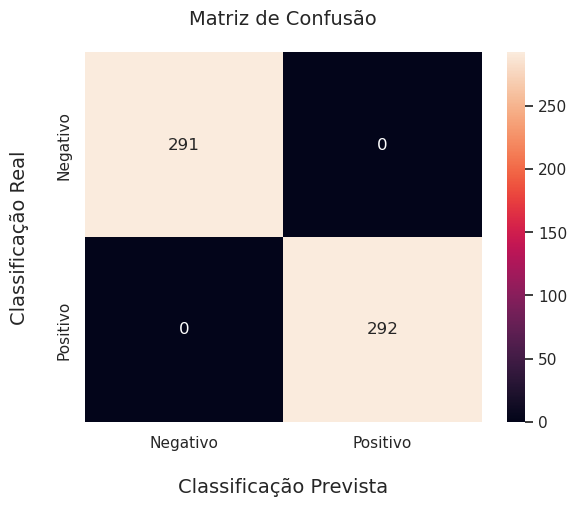

In [16]:
plot_relatorio_eff_1x5 (Y_pred = Rlin_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Regressão Logística

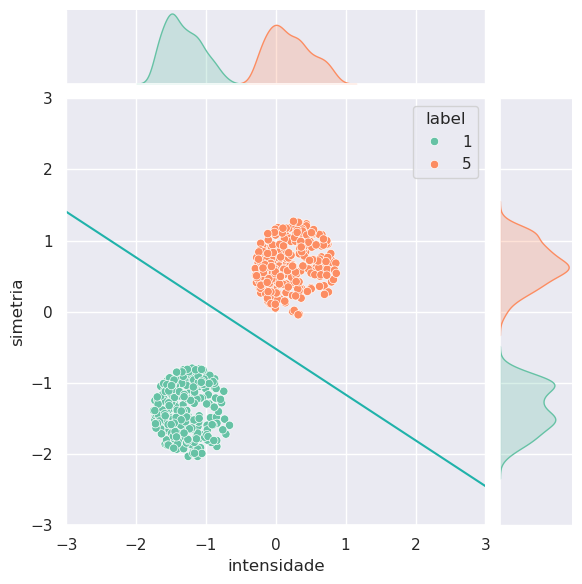

In [17]:
#Instanciando o objeto:
Rlog_1x5 = Reg_Log (n_int = 1000, tam_batch = 50)

#Treinando:
Rlog_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlog_w_1x5 = Rlog_1x5.get_w()

#Observando no gráfico:
plot_alg_1x5 (w_lista = Rlog_w_1x5, dados_df = test)

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



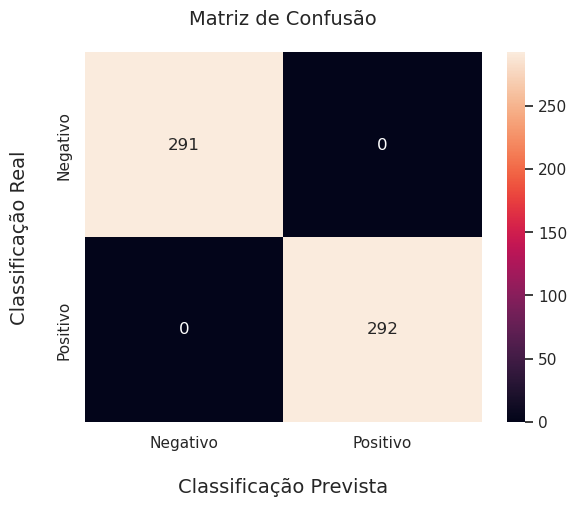

In [18]:
plot_relatorio_eff_1x5 (Y_pred = Rlog_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Discussão dos Resultados

- Podemos observar que os dígitos 1 e 5, com esses parâmetros, ficam fortemente concentrados em suas respectivas vizinhanças no gráfico; 
- Todos os modelos conseguiram alcançar 100% de acurácia, devido aos dígitos 1 e 5 serem linearmente separáveis. Assim, nenhum modelo se sobressaiu quanto a resultados nesse teste;

## Classificação de Dígitos Completo

In [12]:
#Ordem utilizada:

ordem_1vTodos = [0, 1, 4, 5]

### Algoritmo UmVSTodos

In [16]:
class UmVSTodos ():
    def __init__ (self, ordem : list, n_int : int = 1000, modelo = None) -> None:
        self.modelo = modelo(n_int = n_int)
        self.ordem = ordem
        self.w_lista = [0 for i in range (len(ordem) - 1)]
    
    def acuracia (self, X : np.array, Y : np.array) -> float:
        soma_PCC = 0
        y_predict = self.predict(X = X)

        for y_pred, y_real in zip (y_predict, Y):
            if (y_pred == y_real):
                soma_PCC += 1
        
        return (soma_PCC/len(X))
        
    def fit (self, X : np.array, Y : np.array, lamb = False) -> None:
        novo_X = X
        novo_Y = Y
        fila = copy(self.ordem)
        self.w_lista = []
        self.lista_lambda = []

        while (len(fila) > 1):
            Y_temp = []
            index_lista = []

            #Adequando as labels
            for i in range(len(novo_Y)):
                if (novo_Y[i] == fila[0]):
                    Y_temp.append(1)
                    index_lista.append(i)
                
                else:
                    Y_temp.append(-1)
            
            #Treinando os pesos de acordo com o modelo
            self.modelo.fit(X = novo_X, Y = Y_temp)
            
            if (lamb):
                self.lista_lambda.append(self.modelo.get_lista_lambda())
            
            self.w_lista.append(self.modelo.get_w())

            #Atualizando as listas, removendo as labels já treinadas
            novo_X = np.delete (novo_X, index_lista, axis = 0)
            novo_Y = np.delete (novo_Y, index_lista)
            fila.remove(fila[0])

        return
    
    def predict (self, X : np.array) -> np.array:
        lista_X = X
        y_predict = np.zeros(len(X), dtype = float)
        aux_ind = np.array([int(i) for i in range (len(X))]) #lista para localizar os indexes originais de cada x

        #Percorrendo os classificadores:
        for i in range (len(self.w_lista)): #[ws(0 v todos ), ws(1 vs 4/5) , ws(4v5)]
            self.modelo.set_w (novo_w = self.w_lista[i])
            y_temp = self.modelo.predict(X = lista_X) #(1 ou -1)
            class_ind = [] #indexes classificados

            for j in range (len(y_temp)):
                if (y_temp[j] == 1):
                    y_predict[aux_ind[j]] = self.ordem[i] #Ordem = [0, 1, 4, 5]
                    class_ind.append(j)

            #Removendo os pontos já classificados:
            lista_X = np.delete (lista_X, class_ind, axis = 0)
            aux_ind = np.delete (aux_ind, class_ind)       

        #Aquele que não foi identificado como +1 em nenhum momento, percente à última label da ordem:
        for k in aux_ind:
            y_predict[k] = self.ordem[-1]    
        
        return y_predict #[0, 1, 4 ou 5]

    def get_lista_lambda (self) -> list:
        try:
            return self.lista_lambda
        
        except:
            print ("Não foi possível recuperar λ. Por favor, se certifique de treinar o modelo adequado antes.\n")                 
    
    def get_w (self) -> np.array:
        try:
            return self.w_lista
        
        except:
            print("Não foi possível recuperar w. Por favor, se certifique de treinar o modelo antes.\n")
    
    def set_ordem (self, nova_ordem : list) -> None:
        self.ordem = nova_ordem

### Perceptron Learning Algorithm (PLA)

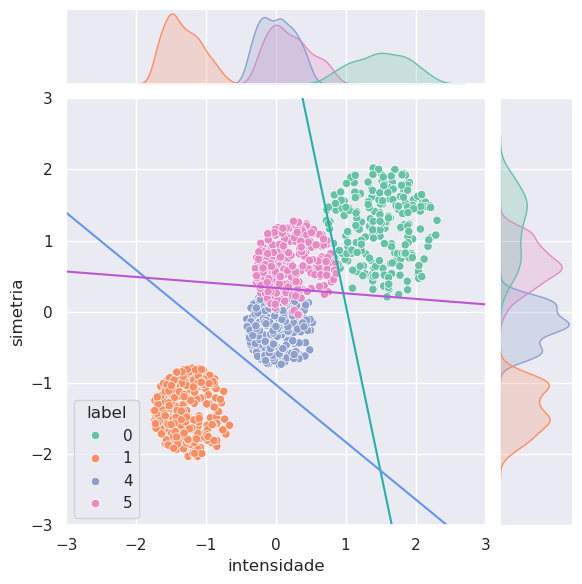

In [21]:
#Instanciando o objeto:
PLA_1vTodos = UmVSTodos (ordem = ordem_1vTodos, n_int = 1000, modelo = PLA)

#Treinando:
PLA_1vTodos.fit(X = X_train, Y = y_train)

#Obtendo os pesos:
PLA_w_1vTodos = PLA_1vTodos.get_w()

#Observando no gráfico:
plot_alg_1vTodos (w_lista = PLA_w_1vTodos, dados_df = test)

Relatório de Eficácia:

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       218
         1.0       1.00      1.00      1.00       292
         4.0       0.90      0.99      0.94       314
         5.0       0.97      0.88      0.92       291

    accuracy                           0.96      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.96      0.96      0.96      1115



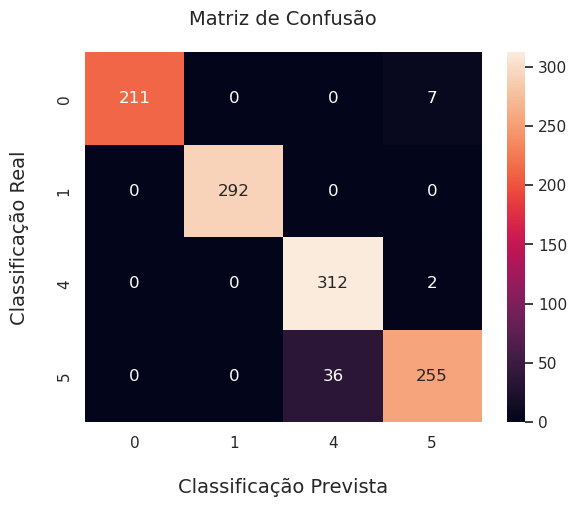

In [22]:
plot_relatorio_eff_1vTodos (Y_pred = PLA_1vTodos.predict(X = X_test), Y_real = y_test, ordem = ordem_1vTodos)

### Regressão Linear

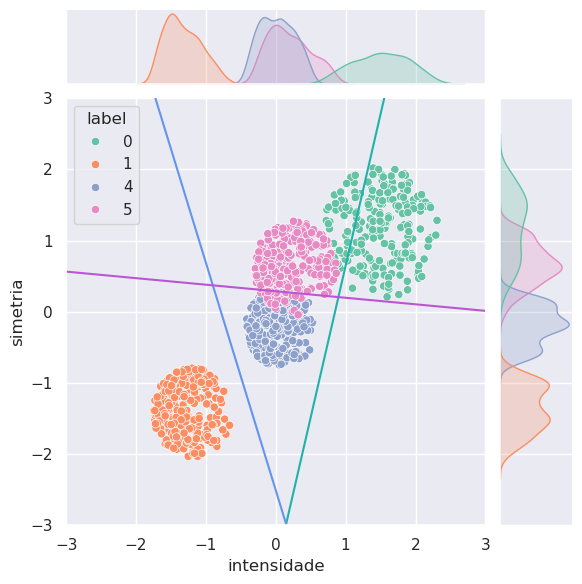

In [23]:
#Instanciando o objeto:
Rlin_1vTodos = UmVSTodos (ordem = ordem_1vTodos, n_int = 1000, modelo = Reg_Lin)

#Treinando:
Rlin_1vTodos.fit(X = X_train, Y = y_train)

#Obtendo os pesos:
Rlin_w_1vTodos = Rlin_1vTodos.get_w()

#Observando no gráfico:
plot_alg_1vTodos (w_lista = Rlin_w_1vTodos, dados_df = test)

Relatório de Eficácia:

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       218
         1.0       1.00      1.00      1.00       292
         4.0       0.92      0.99      0.95       314
         5.0       0.85      0.90      0.87       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



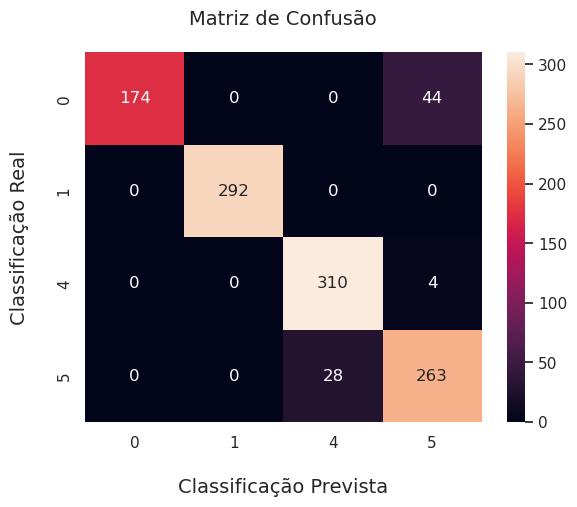

In [24]:
plot_relatorio_eff_1vTodos (Y_pred = Rlin_1vTodos.predict(X = X_test), Y_real = y_test, ordem = ordem_1vTodos)

### Regressão Logística

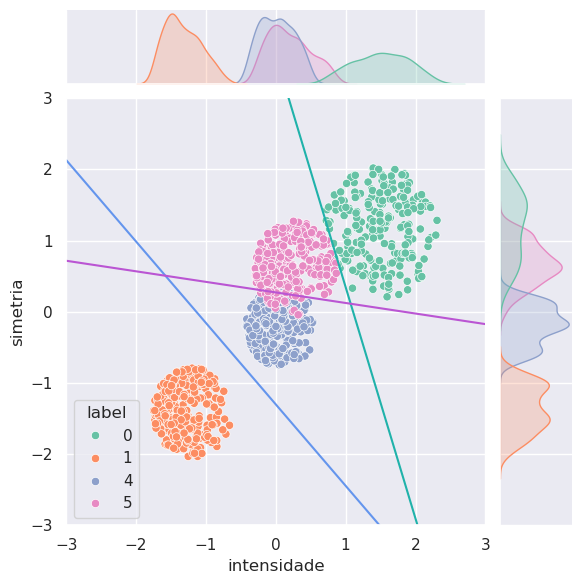

In [25]:
#Instanciando o objeto:
Rlog_1vTodos = UmVSTodos (ordem = ordem_1vTodos, n_int = 1000, modelo = Reg_Log)

#Treinando:
Rlog_1vTodos.fit(X = X_train, Y = y_train)

#Obtendo os peso
Rlog_w_1vTodos = Rlog_1vTodos.get_w()

#Observando no gráfico:
plot_alg_1vTodos (w_lista = Rlog_w_1vTodos, dados_df = test)

Relatório de Eficácia:

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       218
         1.0       1.00      1.00      1.00       292
         4.0       0.92      0.97      0.95       314
         5.0       0.95      0.91      0.93       291

    accuracy                           0.96      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.96      0.96      0.96      1115



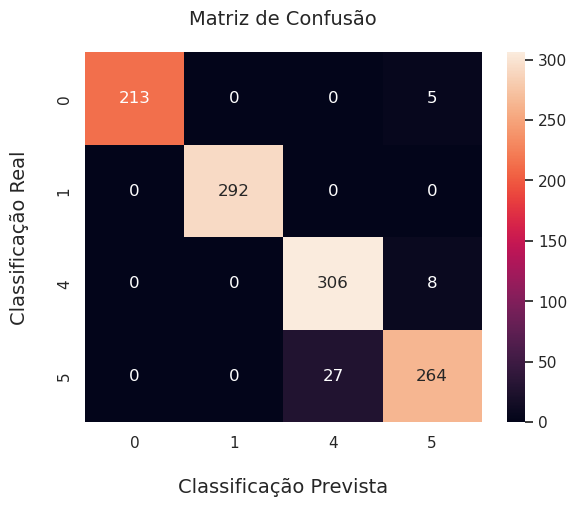

In [26]:
plot_relatorio_eff_1vTodos (Y_pred = Rlog_1vTodos.predict(X = X_test), Y_real = y_test, ordem = ordem_1vTodos)

### Discussão dos Resultados

- Podemos observar que os dígitos 0 e 5 não podem ser linearmente separáveis por esses parâmetros, mas que os conjuntos possuem pouca sobreposição, levando a poucos erros;
- Os conjuntos dos dígitos 4 e 5 possuem maior sopreposição e são os conjuntos em que os classificadores tiverem os piores resultados;
- Todos os algoritmos alcançaram resultados similares. 

## Implementações Avançadas

### Aplicando o Weight-Decay

In [17]:
#Iremos regularizar lambda testando seus resultados para valores 10^x em que x seja um inteiro e
#esteja presente no intervalo [-5, 5], bem como o padrão, λ = 0

WeightDecay = UmVSTodos (n_int = 1000, ordem = ordem_1vTodos, modelo = Weight_Decay)
WeightDecay.fit(X = X_train, Y = y_train, lamb = True)

lambda_df_class0 = pd.DataFrame(data = WeightDecay.get_lista_lambda()[0], columns = ['λ (0vTodos)', 'Eout (0vTodos)'])
lambda_df_class0.sort_values(by = 'Eout (0vTodos)')

,λ (0vTodos),Eout (0vTodos)
0,0.00000,0.000000
1,0.00001,0.000000
2,0.00010,0.000000
3,0.00100,0.000000
4,0.01000,0.004566
5,0.10000,0.011416
6,1.00000,0.018265
7,10.00000,0.557078


In [19]:
lambda_df_class1 = pd.DataFrame(data = WeightDecay.get_lista_lambda()[1], columns = ['λ (1v4,5)', 'Eout (1v4,5)'])
lambda_df_class1.sort_values(by = 'Eout (1v4,5)')

,"λ (1v4,5)","Eout (1v4,5)"
0,0.00000,0.000000
1,0.00001,0.000000
2,0.00010,0.000000
3,0.00100,0.000000
4,0.01000,0.000000
5,0.10000,0.000000
6,1.00000,0.065156
7,10.00000,0.660057


In [21]:
lambda_df_class4 = pd.DataFrame(data = WeightDecay.get_lista_lambda()[2], columns = ['λ (4v5)', 'Eout (4v5)'])
lambda_df_class4.sort_values(by = 'Eout (4v5)')

,λ (4v5),Eout (4v5)
4,0.01000,0.077922
3,0.00100,0.082251
0,0.00000,0.095238
1,0.00001,0.095238
2,0.00010,0.095238
5,0.10000,0.099567
6,1.00000,0.142857
7,10.00000,0.523810


- É possível notar que utilizando o weight-decay, o algoritmo oferece resultados melhores tanto para com λ = 0,01 quanto para λ = 0,001, com o primeiro se sobressaindo aos demais.

### Definindo a Melhor Ordem

In [ ]:
ordens_possiveis = [[0, 1, 4, 5], [0, 1, 5, 4], [0, 4, 1, 5], [0, 4, 5, 1], [0, 5, 1, 4], [0, 5, 4, 1],
                    [1, 0, 4, 5], [1, 0, 5, 4], [1, 4, 0, 5], [1, 4, 5, 0], [1, 5, 0, 4], [1, 5, 4, 0],
                    [4, 1, 0, 5], [4, 1, 5, 0], [4, 0, 1, 5], [4, 0, 5, 1], [4, 5, 1, 0], [4, 5, 0, 1],
                    [5, 1, 4, 0], [5, 1, 0, 4], [5, 4, 1, 0], [5, 4, 0, 1], [5, 0, 1, 4], [5, 0, 4, 1]]

#### PLA

In [ ]:
Acc_PLA = []

for o in ordens_possiveis:
    Comp_PLA = UmVSTodos (ordem = o, n_int = 500, modelo = PLA)
    Comp_PLA.fit(X = X_train, Y = y_train)
    Acc_PLA.append([o, Comp_PLA.acuracia (X = X_test, Y = y_test)])

PLA_df = pd.DataFrame(data = Acc_PLA, columns = ["Ordem", "Acurácia"])
PLA_df.sort_values(by = 'Acurácia', ascending = False)

,Ordem,Acurácia
5,"[0, 5, 4, 1]",0.966816
4,"[0, 5, 1, 4]",0.965919
0,"[0, 1, 4, 5]",0.965022
8,"[1, 4, 0, 5]",0.965022
9,"[1, 4, 5, 0]",0.965022
1,"[0, 1, 5, 4]",0.964126
7,"[1, 0, 5, 4]",0.960538
6,"[1, 0, 4, 5]",0.958744
11,"[1, 5, 4, 0]",0.873543
10,"[1, 5, 0, 4]",0.868161


- Geralmente as ordens que começam separando os dígitos 0 e 5 ou 1 e 0 levam a melhor;
- Podemos notar também que, separar o 1 ao fim piora o resultado, por ser o mais linearmente separável dos demais conjuntos e isso não poder ser explorado pela existência do(s) classificador(es) já feito(s) previamente. 

#### Regressão Linear

In [ ]:
Acc_Rlin = []

for o in ordens_possiveis:
    Comp_Rlin = UmVSTodos (ordem = o, n_int = 1000, modelo = Reg_Lin)
    Comp_Rlin.fit(X = X_train, Y = y_train)
    Acc_Rlin.append([o, Comp_Rlin.acuracia (X = X_test, Y = y_test)])

Rlin_df = pd.DataFrame(data = Acc_Rlin, columns = ["Ordem", "Acurácia"])
Rlin_df.sort_values(by = 'Acurácia', ascending = False)

,Ordem,Acurácia
6,"[1, 0, 4, 5]",0.960538
7,"[1, 0, 5, 4]",0.960538
8,"[1, 4, 0, 5]",0.956951
9,"[1, 4, 5, 0]",0.956951
0,"[0, 1, 4, 5]",0.931839
1,"[0, 1, 5, 4]",0.931839
4,"[0, 5, 1, 4]",0.906726
5,"[0, 5, 4, 1]",0.906726
10,"[1, 5, 0, 4]",0.864574
11,"[1, 5, 4, 0]",0.864574


- Melhores resultados usuais: [1, 0, 4, 5] e [1, 0, 5, 4].

#### Regressão Logística

In [ ]:
Acc_Rlog = []

for o in ordens_possiveis:
    Comp_Rlog = UmVSTodos (ordem = o, n_int = 1000, modelo = Reg_Lin)
    Comp_Rlog.fit(X = X_train, Y = y_train)
    Acc_Rlog.append([o, Comp_Rlog.acuracia (X = X_test, Y = y_test)])

Rlog_df = pd.DataFrame(data = Acc_Rlog, columns = ["Ordem", "Acurácia"])
Rlog_df.sort_values(by = 'Acurácia', ascending = False)

,Ordem,Acurácia
6,"[1, 0, 4, 5]",0.960538
7,"[1, 0, 5, 4]",0.960538
8,"[1, 4, 0, 5]",0.956951
9,"[1, 4, 5, 0]",0.956951
0,"[0, 1, 4, 5]",0.931839
1,"[0, 1, 5, 4]",0.931839
4,"[0, 5, 1, 4]",0.906726
5,"[0, 5, 4, 1]",0.906726
10,"[1, 5, 0, 4]",0.864574
11,"[1, 5, 4, 0]",0.864574


- Novamente, os melhores resultados são geralmente de [1, 0, 5, 4] e [1, 0, 4, 5].